In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model
import os

from utils import config, DataGenerator

In [2]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ["Input Image", "True Mask", "Predicted Mask"]

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis("off")
  plt.show()

In [13]:
model = load_model(f"trained_models/trained-acc78-lr0.001-flt_num-64.h5")

In [14]:
def load_data():
    masks_dir = os.path.join(config.DATASET_DIR, "masks")
    images_dir = os.path.join(config.DATASET_DIR, "images")

    data_gen = DataGenerator.DataGenerator(images_dir, masks_dir)

    data_gen.map_preprocess()

    return data_gen

In [15]:
data_gen = load_data()

test_batches = data_gen.test_dataset.cache().batch(config.BATCH_SIZE)
test_batches = test_batches.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

Found 5108 images.
4086 of them are in train set, and the rest 1022 are in the test set.


In [16]:
model.evaluate(test_batches)

256/256 [==============================] - 41s 159ms/step - loss: 0.4743 - acc: 0.7877


[0.4742570221424103, 0.7876898646354675]

In [20]:
# index = np.random.randint(y_pred.shape[0])
index = 0
sample_batch = next(iter(test_batches))


In [21]:
sample_mask = sample_batch[1][index]
sample_image = sample_batch[0][index]

y_pred = model.predict(sample_batch[0])
pred_mask = (y_pred[index] < 0.5).astype(int)

1/1 [==============================] - 0s 201ms/step


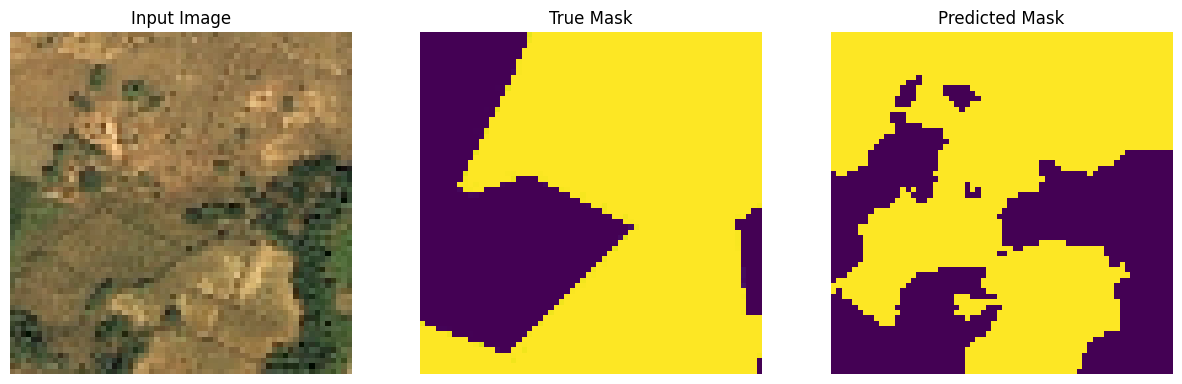

In [22]:
display([sample_image, sample_mask, pred_mask])